In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [3]:
df = pd.read_csv('numeric_accidents_data.csv')

In [4]:
df.shape

(617972, 18)

In [5]:
df.head()

,where,how,illumination,typeofroad,refnismun,refnisdist,refnisprov,refnisgew,dead,deadafter30d,mortallyinjured,severelyinjured,slightlyinjured,month,year,quarter,dayow,hr
0,2.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,10
1,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,3,16
2,1.0,4.0,1.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,16
3,1.0,7.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,24
4,2.0,4.0,3.0,2.0,11001,11000,10000.0,2000,0,0,0,0,1,1,2005,1,2,19


## Missing data

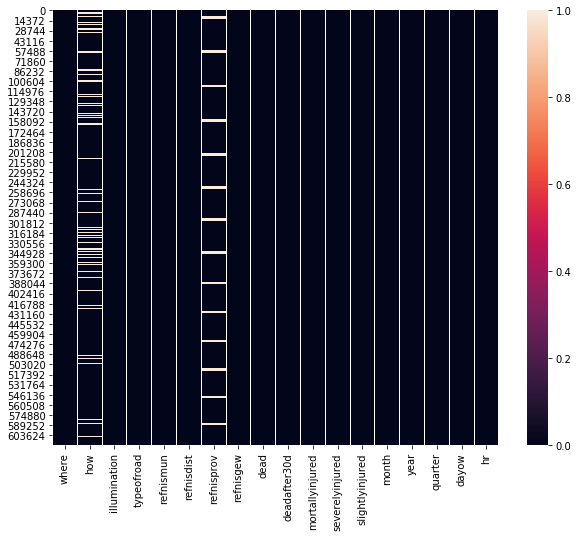

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617972 entries, 0 to 617971
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   where            617972 non-null  float64
 1   how              541110 non-null  float64
 2   illumination     617972 non-null  float64
 3   typeofroad       617972 non-null  float64
 4   refnismun        617972 non-null  int64  
 5   refnisdist       617972 non-null  int64  
 6   refnisprov       564427 non-null  float64
 7   refnisgew        617972 non-null  int64  
 8   dead             617972 non-null  int64  
 9   deadafter30d     617972 non-null  int64  
 10  mortallyinjured  617972 non-null  int64  
 11  severelyinjured  617972 non-null  int64  
 12  slightlyinjured  617972 non-null  int64  
 13  month            617972 non-null  int64  
 14  year             617972 non-null  int64  
 15  quarter          617972 non-null  int64  
 16  dayow            617972 non-null  int6

In [8]:
((617972-541110)/617972)*100 

12.43778035250788

In [9]:
((617972-564427)/617972)*100 

8.664632054526743

~12.5% of 'how' missing
~8.7% of 'refnisprov' missing

1)do I need them?
2)if yes, correlation with another column to replace missing values?
    -'refnismun' should have perfect correlation with refnisprov

In [10]:
df_cor = df[['refnismun','refnisprov']]

In [11]:
corrMatrix_ = df_cor.corr()

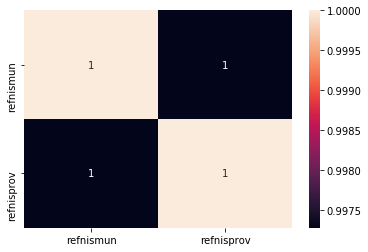

In [12]:
sns.heatmap(corrMatrix_,annot=True)

In [13]:
empty_prov = df_cor[df_cor['refnisprov'].isnull()]

In [14]:
empty_prov

,refnismun,refnisprov
8648,21001,NaN
8649,21001,NaN
8650,21001,NaN
8651,21001,NaN
8652,21001,NaN
...,...,...
590266,21019,NaN
590267,21019,NaN
590268,21019,NaN
590269,21019,NaN


In [15]:
empty_prov['refnismun'].unique()

array([21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019], dtype=int64)

In [16]:
os.getcwd()

'D:\\GitHub\\Road_accidents_Belgium'

In [17]:
os.chdir('D:\\GitHub\\Road_accidents_Belgium\\Geoplot')

In [18]:
df_refnis = pd.read_excel('refnis.xlsx')

In [19]:
#remove french columns
df_refnis = df_refnis.drop(['Code INS','Entités administratives','Langue'], axis=1)

In [20]:
df_refnis

,Code NIS,Administratieve eenheden,Taal
0,1000,HET RIJK,NaN
1,4000,BRUSSELS HOOFDSTEDELIJK GEWEST,NaN
2,21000,Arrondissement Brussel Hoofdstad,NaN
3,21001,Anderlecht,NaN
4,21002,Oudergem,NF
...,...,...,...
641,93018,Doische,F
642,93022,Florennes,F
643,93056,Philippeville,F
644,93090,Viroinval,F


In [21]:
list_prov = [21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009,
       21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018,
       21019]

In [22]:
def printforme(x):
    
    for y in x:
        print(str(y)+' = '+str(df_refnis[df_refnis['Code NIS']==y]['Administratieve eenheden']))

In [23]:
printforme(list_prov)

21001 = 3    Anderlecht
Name: Administratieve eenheden, dtype: object
21002 = 4    Oudergem
Name: Administratieve eenheden, dtype: object
21003 = 5    Sint-Agatha-Berchem
Name: Administratieve eenheden, dtype: object
21004 = 6    Brussel
Name: Administratieve eenheden, dtype: object
21005 = 7    Etterbeek
Name: Administratieve eenheden, dtype: object
21006 = 8    Evere
Name: Administratieve eenheden, dtype: object
21007 = 9    Vorst
Name: Administratieve eenheden, dtype: object
21008 = 10    Ganshoren
Name: Administratieve eenheden, dtype: object
21009 = 11    Elsene
Name: Administratieve eenheden, dtype: object
21010 = 12    Jette
Name: Administratieve eenheden, dtype: object
21011 = 13    Koekelberg
Name: Administratieve eenheden, dtype: object
21012 = 14    Sint-Jans-Molenbeek
Name: Administratieve eenheden, dtype: object
21013 = 15    Sint-Gillis
Name: Administratieve eenheden, dtype: object
21014 = 16    Sint-Joost-ten-Node
Name: Administratieve eenheden, dtype: object
21015 = 17 

In [24]:
#Turns out they are all municipalities in Brussels Capital Region
#NIS Brussels Capital Region = 4000 

In [25]:
def replace_nan(x):    
     
    if pd.isnull(x):
        return 4000
    else:
        return x

In [26]:
df['refnisprov']=df['refnisprov'].apply(replace_nan)

In [27]:
df['refnisprov'].isnull().sum()

0

In [28]:
#df[df['refnisprov']==4000]

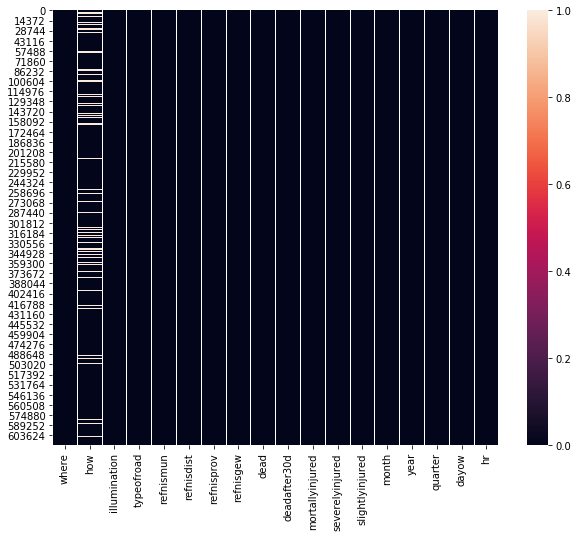

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [30]:
corr_with_how = df.corrwith(df['how'])

In [31]:
corr_with_how.sort_values(ascending=False)

how                1.000000
illumination       0.175358
refnismun          0.124410
refnisdist         0.124369
refnisprov         0.118298
dayow              0.096691
where              0.092684
refnisgew          0.090543
severelyinjured    0.069317
deadafter30d       0.049215
dead               0.045864
mortallyinjured    0.017614
year              -0.004144
quarter           -0.004944
month             -0.006420
typeofroad        -0.070383
slightlyinjured   -0.085948
hr                -0.105723
dtype: float64

Too low of a correlation

remove NaN rows

In [32]:
df=df.dropna()

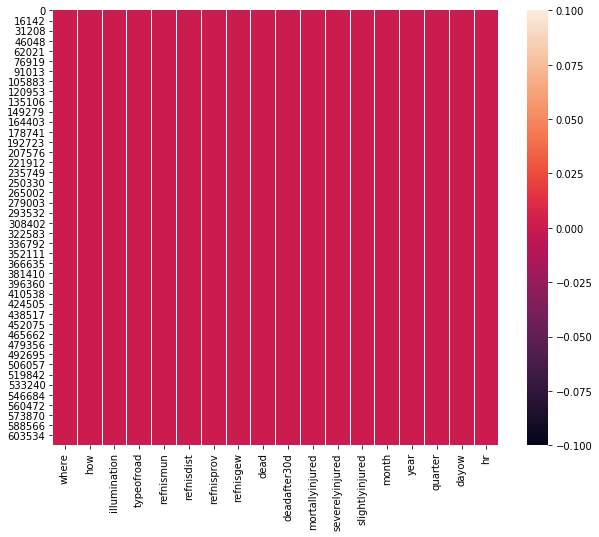

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541110 entries, 0 to 617971
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   where            541110 non-null  float64
 1   how              541110 non-null  float64
 2   illumination     541110 non-null  float64
 3   typeofroad       541110 non-null  float64
 4   refnismun        541110 non-null  int64  
 5   refnisdist       541110 non-null  int64  
 6   refnisprov       541110 non-null  float64
 7   refnisgew        541110 non-null  int64  
 8   dead             541110 non-null  int64  
 9   deadafter30d     541110 non-null  int64  
 10  mortallyinjured  541110 non-null  int64  
 11  severelyinjured  541110 non-null  int64  
 12  slightlyinjured  541110 non-null  int64  
 13  month            541110 non-null  int64  
 14  year             541110 non-null  int64  
 15  quarter          541110 non-null  int64  
 16  dayow            541110 non-null  int6

In [35]:
df = df.drop(['refnismun','refnisdist','refnisgew','slightlyinjured'],axis=1)

prov_dict = {4000.0:'1',
            10000.0:'2',
            20001.0:'3',
            20002.0:'4',
            30000.0:'5',
            40000.0:'6',
            50000.0:'7',
            60000.0:'8',
            70000.0:'9',
            80000.0:'10',
            90000.0:'11',}

df['refnisprov'] = df['refnisprov'].replace({4000.0:'1',
            10000.0:'2',
            20001.0:'3',
            20002.0:'4',
            30000.0:'5',
            40000.0:'6',
            50000.0:'7',
            60000.0:'8',
            70000.0:'9',
            80000.0:'10',
            90000.0:'11',})

year_dict = {2005:'5',
            2006:'6',
            2007:'7',
            2008:'8',
            2009:'9',
            2010:'10',
            2011:'11',
            2012:'12',
            2013:'13',
            2014:'14',
            2015:'15',
            2016:'16',
            2017:'17',
            2018:'18'}

df['year'] = df['year'].replace({2005:'5',
            2006:'6',
            2007:'7',
            2008:'8',
            2009:'9',
            2010:'10',
            2011:'11',
            2012:'12',
            2013:'13',
            2014:'14',
            2015:'15',
            2016:'16',
            2017:'17',
            2018:'18'})

slightlyinjured_dict = {2:0,3:0}


## Exploratory Data Analysis 

In [36]:
sns.set_style('whitegrid')

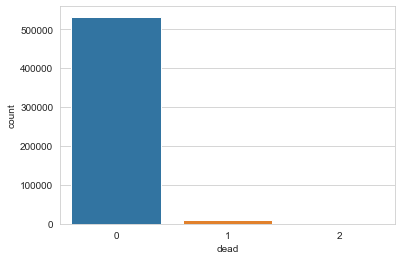

In [37]:
sns.countplot(df['dead'])

In [38]:
df['dead'].value_counts()

0    532158
1      8951
2         1
Name: dead, dtype: int64

In [39]:
df= df[df.dead != 2]

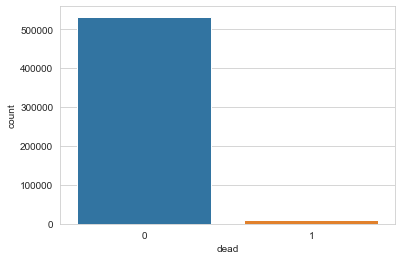

In [55]:
sns.countplot(df['dead'])

In [41]:
len(df[df['dead']==0])

532158

In [42]:
len(df[df['dead']==1])

8951

In [43]:
(8951/(8951+532158))*100

1.654195365443931

Dataset (luckily, few deadly accidents as possible!) not well balanced (dead/survived ratio)
Important for model training
1.65% of recordings resulted in death
Impossible to train a model like this
I could try (random) bucketing of the alive cases

In [44]:
532158/8951

59.45235169254832

I can make 59 random buckets

In [45]:
bucket_death = df[df['dead']==1]

In [84]:
alive_bucket_list = {}

def generate_alive_buckets():
    for name in np.arange(1,59,1):
        alive_bucket_list[name] = df[df['dead']==0].sample(n=8951)


In [85]:
generate_alive_buckets()

In [89]:
final_bucket_list = {}

def append_alive_death_buckets():
    for x in np.arange(1,59,1):
        final_bucket_list[x] = alive_bucket_list[x].append(bucket_death)
    

In [90]:
append_alive_death_buckets()

In [109]:
final_bucket_list[8]

,where,how,illumination,typeofroad,refnisprov,dead,deadafter30d,mortallyinjured,severelyinjured,month,year,quarter,dayow,hr
342767,2.0,4.0,1.0,2.0,2,0,0,0,0,2,12,1,4,13
462300,1.0,5.0,1.0,2.0,2,0,0,0,0,3,15,1,3,18
111980,1.0,4.0,1.0,2.0,5,0,0,0,0,4,7,2,5,16
78353,1.0,7.0,1.0,2.0,7,0,0,0,0,1,6,1,2,9
289476,1.0,5.0,1.0,2.0,2,0,0,0,0,9,11,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617856,1.0,7.0,1.0,2.0,4,1,1,0,0,7,18,3,3,22
617869,2.0,5.0,5.0,1.0,4,1,1,0,0,7,18,3,6,4
617874,2.0,7.0,3.0,1.0,4,1,1,0,0,11,18,4,1,23
617944,2.0,7.0,3.0,2.0,4,1,1,0,0,6,18,2,6,24


In [107]:
def equal():
    for x in np.arange(1,59,1):
        print(x)
        sns.countplot(final_bucket_list[x]['dead'])
        print('\n')
        

In [112]:
def plotfunction(df):
    
    for x in df.columns:
        plt.figure(figsize=(15,8))
        sns.countplot(x = str(x),
                  data = df_bucket_1,
                  order = df_bucket_1[str(x)].value_counts().index)
        print('\n')


In [113]:
plotfunction(df_bucket_1)

AttributeError: 'dict' object has no attribute 'columns'

In [52]:
df_bucket_1

,where,how,illumination,typeofroad,refnisprov,dead,deadafter30d,mortallyinjured,severelyinjured,month,year,quarter,dayow,hr
99325,2.0,4.0,1.0,2.0,2,0,0,0,0,8,7,3,7,15
429923,1.0,2.0,1.0,2.0,1,0,0,0,0,5,14,2,5,10
530477,2.0,3.0,1.0,2.0,8,0,0,0,0,3,16,1,5,10
296661,1.0,2.0,3.0,2.0,1,0,0,0,0,11,11,4,2,6
225500,1.0,5.0,1.0,2.0,8,0,0,0,0,5,9,2,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617856,1.0,7.0,1.0,2.0,4,1,1,0,0,7,18,3,3,22
617869,2.0,5.0,5.0,1.0,4,1,1,0,0,7,18,3,6,4
617874,2.0,7.0,3.0,1.0,4,1,1,0,0,11,18,4,1,23
617944,2.0,7.0,3.0,2.0,4,1,1,0,0,6,18,2,6,24


In [ ]:
sns.pairplot(df_bucket_1)

In [ ]:
df_bucket_1

In [ ]:
df_bucket_1 = df_bucket_1.drop(['deadafter30d','mortallyinjured','severelyinjured'],axis=1)

In [ ]:
df_bucket_1

In [ ]:
df_bucket_1 = df_bucket_1.drop(['slightlyinjured'],axis=1)

In [ ]:
df_bucket_1

In [ ]:
#3 regions in Belgium
df['refnisgew'].unique()
#2000 = vlaams gewest
#3000 = waals gewest
#4000 = brussels gewest

#11 provinces in Belgium
#df['refnisprov'].unique()
#df['refnisprov'].value_counts()

In [ ]:
df_bucket_1.info()

In [ ]:
df_bucket_1.describe().transpose()

In [ ]:
df_bucket_1.corr()[df_bucket_1]['dead'].sort_values()

In [ ]:
plt.figure(figsize=[10,6])
sns.heatmap(df_bucket_1.corr(),annot=True)

# Logistic Regression

Train test split, and train the model

In [ ]:
X = df_bucket_1[['where', 'how', 'illumination', 'typeofroad', 'refnisprov','month', 'year', 'quarter', 'dayow', 'hr']]
y = df_bucket_1['dead']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.364, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

## Predictions and Evaluations

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

 TP   FN 
 FP   TN

-TP times it predicts correctly that an accident wil occur
-FP times it predicts incorrectly that an accident will occur
-FN times it predicts incorrectly there's no accident, while there is
-TN times it predicts correctly that there won't be an accident

## effect of test_size?

In [ ]:
list_plot = []

for alpha in  np.arange(0.001, 1, 0.001):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=alpha, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    list_plot.append(float(accuracy_score(y_test,predictions)))



In [ ]:
plt.plot(np.arange(0.001, 1, 0.001),list_plot)

In [ ]:
size=np.arange(0.001, 1, 0.001)

In [ ]:
performance = pd.DataFrame([size,list_plot])

In [ ]:
performance

In [ ]:
performance = performance.transpose()

In [ ]:
performance.columns = ['test size','accuracy_score']

In [ ]:
performance = performance[performance['test size'].between(0.2, 0.6)]

In [ ]:
performance['accuracy_score'].plot()

In [ ]:
performance['accuracy_score'].max()

In [ ]:
performance[performance['accuracy_score']==0.6681194511702986]

Test size = 0.346 for accuracy of 0.668119 for bucket 1